In [1]:
import numpy as np


In [13]:
label_list=[]
pred_list=[]

one=['0','1','2','3','4','5','6','7','8','9']

with open('/home/kathy531/Caesar-lig/code/notebooks/AEinfer_0822.txt','r') as f:
    
    for line in f:
        label_dict={}
        pred_dict={}
        if line[:3]=='Vib':
            line= line.split(" ")
            label_dict['Vib'] = float(line[2])
            label_dict['Rot'] = float(line[5])
            label_dict['Conf'] = float(line[8])
            label_dict['Trans'] = float(line[11][:-1])
            pred_dict['Vib'] = float(line[1])
            pred_dict['Rot'] = float(line[4])
            pred_dict['Conf'] = float(line[7])
            pred_dict['Trans'] = float(line[10])
            
        else: continue
        label_list.append(label_dict)
        pred_list.append(pred_dict)

#print(label_list3)
#print(len(label_list3))
print(len(pred_list))
#
print(len(label_list))

15000
15000


In [19]:
import numpy as np
vib_mse=0
rot_mse=0
conf_mse=0
trans_mse=0
for i in range(len(label_list)):
    vib_mse+=(label_list[i]['Vib']-pred_list[i]['Vib'])**2
    rot_mse+=(label_list[i]['Rot']-pred_list[i]['Rot'])**2
    conf_mse+=(label_list[i]['Conf']-pred_list[i]['Conf'])**2
    trans_mse+=(label_list[i]['Trans']-pred_list[i]['Trans'])**2
print(f"Vib RMSE: {round(np.sqrt(vib_mse/len(label_list)),4)}")
print(f"Rot RMSE: {round(np.sqrt(rot_mse/len(label_list)),4)}")
print(f"Conf RMSE: {round(np.sqrt(conf_mse/len(label_list)),4)}")
print(f"Trans RMSE: {round(np.sqrt(trans_mse/len(label_list)),4)}")


Vib RMSE: 2.3617
Rot RMSE: 1.6336
Conf RMSE: 2.1886
Trans RMSE: 2.0992


# AE inference(0827)

##### convert txt to csv

In [1]:
# 입력 파일 이름
input_file = "infer_0827.txt"

# 출력 파일 이름
output_file = "infer_0827.csv"

# 데이터를 쉼표로 구분하여 저장할 리스트
output_data = []

# 입력 파일 열기
with open(input_file, 'r') as file:
    # 각 줄에 대해 반복
    for line in file:
        
        
        # 띄어쓰기를 기준으로 데이터 분할
        data = line.split(" ")
        #data = line.split(" ")
        
        # 쉼표로 구분된 문자열 생성하여 출력 데이터에 추가
        output_line = ','.join(data)
        output_data.append(output_line)
        

# 출력 파일에 결과 쓰기
with open(output_file, 'w') as file:
    for line in output_data:
        file.write(line)

print("변환 완료!")

변환 완료!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('infer_0827.csv')
df['ex_vib']

0      33.7723
1      30.1510
2      32.1785
3      48.1524
4      34.7727
        ...   
292    32.6271
293    28.6775
294    42.0784
295    31.6689
296    25.8093
Name: ex_vib, Length: 297, dtype: float64

## scatter plot

In [6]:
from scipy.stats import gaussian_kde

In [10]:
from scipy.stats import pearsonr

##### Vib Entropy

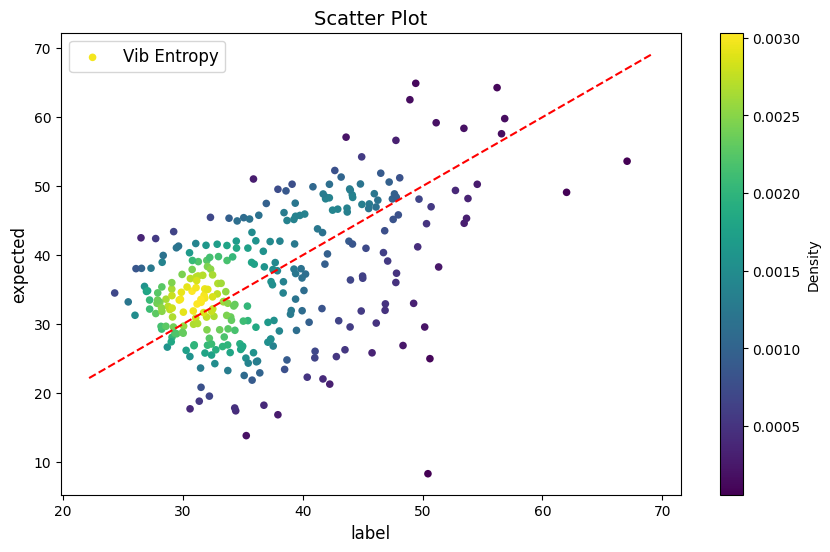

In [5]:
name='Vib Entropy'
group=df
plt.figure(figsize=(10,6))
x=group['label_vib']
y=group['ex_vib']
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)
scatter=plt.scatter(x,y,c=z,s=30,edgecolors='none',label=f'{name}')
plt.colorbar(scatter, label='Density')
space=np.linspace(*plt.xlim(),100)

plt.plot(space,space, 'r--')

plt.title("Scatter Plot", fontsize=14)
plt.xlabel('label',fontsize=12)
plt.ylabel('expected', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [11]:
correlation,_ = pearsonr(df['label_vib'], df['ex_vib'])
print(f"Corr: {round(correlation,4)}")

Corr: 0.4881


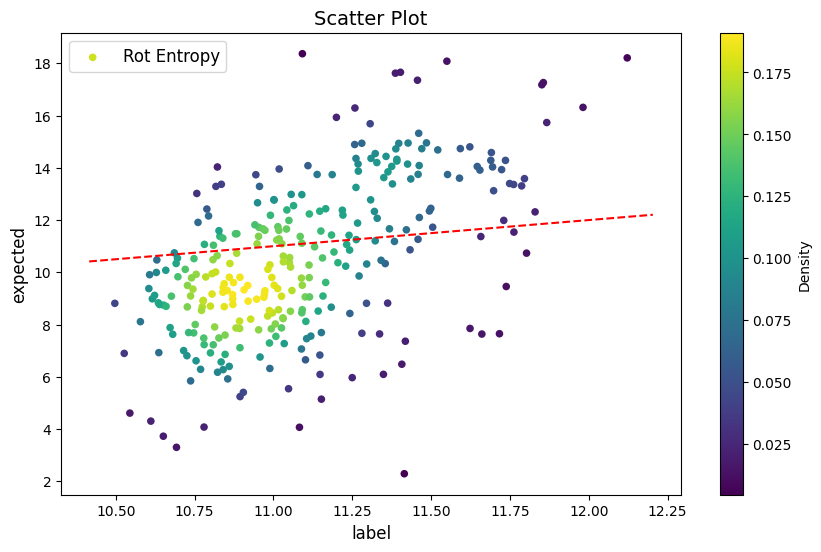

In [7]:
name='Rot Entropy'
group=df
plt.figure(figsize=(10,6))
x=group['label_rot']
y=group['ex_rot']
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)
scatter=plt.scatter(x,y,c=z,s=30,edgecolors='none',label=f'{name}')
plt.colorbar(scatter, label='Density')
space=np.linspace(*plt.xlim(),100)

plt.plot(space,space, 'r--')

plt.title("Scatter Plot", fontsize=14)
plt.xlabel('label',fontsize=12)
plt.ylabel('expected', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [12]:
correlation,_ = pearsonr(df['label_rot'], df['ex_rot'])
print(f"Corr: {round(correlation,4)}")

Corr: 0.558


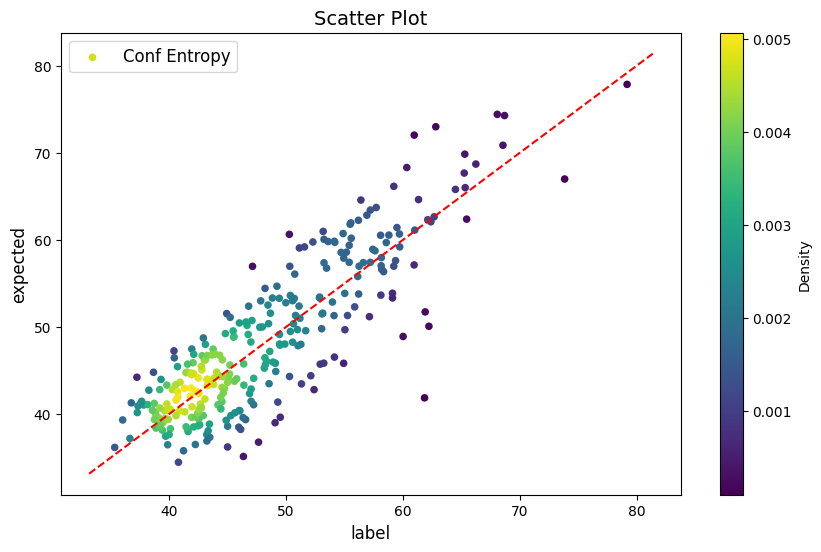

In [8]:
name='Conf Entropy'
group=df
plt.figure(figsize=(10,6))
x=group['label_conf']
y=group['ex_conf']
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)
scatter=plt.scatter(x,y,c=z,s=30,edgecolors='none',label=f'{name}')
plt.colorbar(scatter, label='Density')
space=np.linspace(*plt.xlim(),100)

plt.plot(space,space, 'r--')

plt.title("Scatter Plot", fontsize=14)
plt.xlabel('label',fontsize=12)
plt.ylabel('expected', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [13]:
correlation,_ = pearsonr(df['label_conf'], df['ex_conf'])
print(f"Corr: {round(correlation,4)}")

Corr: 0.8594


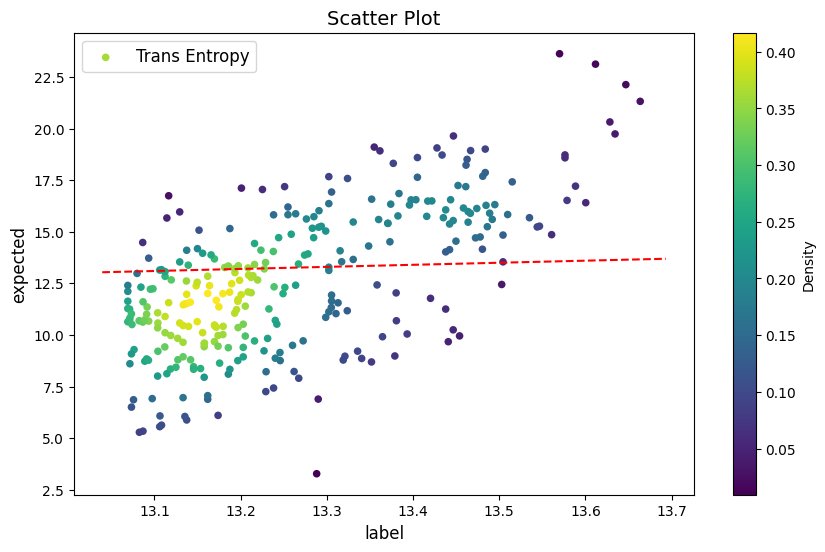

In [9]:
name='Trans Entropy'
group=df
plt.figure(figsize=(10,6))
x=group['label_trans']
y=group['ex_trans']
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)
scatter=plt.scatter(x,y,c=z,s=30,edgecolors='none',label=f'{name}')
plt.colorbar(scatter, label='Density')
space=np.linspace(*plt.xlim(),100)

plt.plot(space,space, 'r--')

plt.title("Scatter Plot", fontsize=14)
plt.xlabel('label',fontsize=12)
plt.ylabel('expected', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [14]:
correlation,_ = pearsonr(df['label_trans'], df['ex_trans'])
print(f"Corr: {round(correlation,4)}")

Corr: 0.6575
